In [3]:
conda install scikit-learn

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
dataset_filename = "affinity_dataset.txt"
X = np.loadtxt(dataset_filename)
n_samples, n_features = X.shape
print("This dataset has {0} samples and {1} features".format(n_samples, n_features))

This dataset has 100 samples and 5 features


In [2]:
print(X[:5])

[[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]


In [7]:
# The names of the features, for your reference.
features = ["bread", "milk", "cheese", "apples", "bananas"]

In [5]:
# In our first example, we will compute the Support and Confidence of the rule "If a person buys Apples, they also buy Bananas".

In [8]:
# First, how many rows contain our premise: that a person is buying apples
num_apple_purchases = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples
        num_apple_purchases += 1
print("{0} people bought Apples".format(num_apple_purchases))

43 people bought Apples


In [9]:
# How many of the cases that a person bought Apples involved the people purchasing Bananas too?
# Record both cases where the rule is valid and is invalid.
rule_valid = 0
rule_invalid = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples
        if sample[4] == 1:
            # This person bought both Apples and Bananas
            rule_valid += 1
        else:
            # This person bought Apples, but not Bananas
            rule_invalid += 1
print("{0} cases of the rule being valid were discovered".format(rule_valid))
print("{0} cases of the rule being invalid were discovered".format(rule_invalid))

27 cases of the rule being valid were discovered
16 cases of the rule being invalid were discovered


In [10]:

# Now we have all the information needed to compute Support and Confidence
support = rule_valid  # The Support is the number of times the rule is discovered.
confidence = rule_valid / num_apple_purchases
print("The support is {0} and the confidence is {1:.3f}.".format(support, confidence))
# Confidence can be thought of as a percentage using the following:
print("As a percentage, that is {0:.1f}%.".format(100 * confidence))

The support is 27 and the confidence is 0.628.
As a percentage, that is 62.8%.


In [11]:
from collections import defaultdict
# Now compute for all possible rules
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

for sample in X:
    for premise in range(n_features):
        if sample[premise] == 0: continue
        # Record that the premise was bought in another transaction
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:  # It makes little sense to measure if X -> X.
                continue
            if sample[conclusion] == 1:
                # This person also bought the conclusion item
                valid_rules[(premise, conclusion)] += 1
            else:
                # This person bought the premise, but not the conclusion
                invalid_rules[(premise, conclusion)] += 1
support = valid_rules
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys():
    confidence[(premise, conclusion)] = valid_rules[(premise, conclusion)] / num_occurences[premise]

In [12]:
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18

Rule: If a person buys apples they will also buy milk
 - Confidence: 0.419
 - Support: 18

Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519


In [13]:
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

In [14]:
premise = 1
conclusion = 3
print_rule(premise, conclusion, support, confidence, features)

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18



In [15]:
# Sort by support
from pprint import pprint
pprint(list(support.items()))

[((0, 1), 13),
 ((1, 0), 13),
 ((2, 4), 20),
 ((4, 2), 20),
 ((2, 3), 22),
 ((3, 2), 22),
 ((3, 4), 27),
 ((4, 3), 27),
 ((1, 3), 18),
 ((3, 1), 18),
 ((1, 4), 27),
 ((4, 1), 27),
 ((0, 2), 5),
 ((2, 0), 5),
 ((0, 4), 16),
 ((4, 0), 16),
 ((1, 2), 11),
 ((2, 1), 11),
 ((0, 3), 9),
 ((3, 0), 9)]


In [16]:
from operator import itemgetter
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

In [17]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule #2
Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule #3
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule #4
Rule: If a person buys bananas they will also buy milk
 - Confidence: 0.474
 - Support: 27

Rule #5
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22



In [18]:

sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)

In [19]:

for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule #2
Rule: If a person buys bread they will also buy bananas
 - Confidence: 0.571
 - Support: 16

Rule #3
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule #4
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule #5
Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20



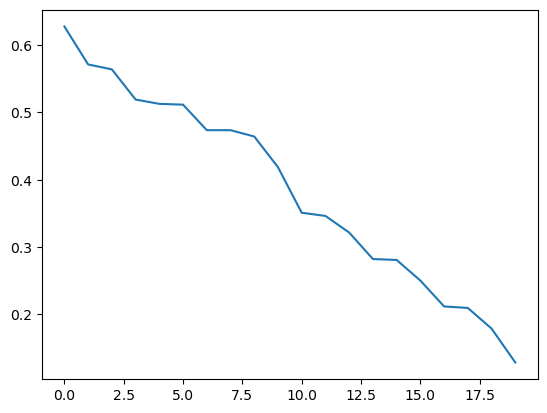

In [20]:
from matplotlib import pyplot as plt 
plt.plot([confidence[rule[0]] for rule in sorted_confidence])

## Using the previous graph, we can see that the first five rules have decent confidence, but the efficacy drops quite quickly after that. Using this information, we might decide to use just the first five rules to drive business decisions. 
